# <img src="https://img.icons8.com/dusk/64/000000/mind-map.png" style="height:50px;display:inline"> CS 236756 - Technion - Intro to Machine Learning
---
#### Tal Daniel

## Tutorial 04 - Dimensionality Reduction & Feature Selection
---

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda
---
* [Motivation](#-Motivation--Why-Dimensionality-Reduction?)
* [Dimensionality Reduction vs. Feature Selection](#-Dimensionality-Reduction)
* [PCA (& SVD for PCA)](#-Principle-Component-Analysis-(PCA))
* [Feature Selection](#-Feature-Selection)
    * [Filter methods](#-Filter-Methods)
    * [Wrapper methods](#Filter-vs.-Wrapper)
* [Recommended Videos](#-Recommended-Videos)
* [Credits](#-Credits)

In [1]:
# imports for the tutorial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

## <img src="https://img.icons8.com/dusk/64/000000/confetti.png" style="height:50px;display:inline"> Motivation- Why Dimensionality Reduction?
---
* Discover Hidden Correlation/Topics - when we reduce dimensions, we sometimes discover correlation between features
    * For example, we can notice two features that occur commonly together
    * *Anomaly Detection*
* Remove Redundant and Noisy Features
    * Not all features are useful and sometimes harm the performance

* Interpretation & Visualiztion
    * For example, when we reduce $n$-dimensional features to 2 or 3, we can plot them and see the relationship with our eyes
* Easier Storage and Processing of the Data
    * Reduces time and space complexity
    * Yields a more optimized process
* Alleviates **The Curse of Dimensionality**

## <img src="https://img.icons8.com/dusk/64/000000/negative-dynamic.png" style="height:50px;display:inline"> Dimensionality Reduction
---
* Dimensionality reduction is the process of reducing the dimensionality of the feature space with consideration by obtaining a set of principal features. 
    * Dimensionality reduction can be further broken into feature selection and feature extraction.
* Dimensionality Reduction vs. **Feature Selection**
    * Differs from feature selection in 2 ways:
        1. Instead of choosing subset of features, it creates new features (dimensions) defined as functions over all features
        2. Does not consider class labels, just data points

* Main Idea:
    * Given data points in **d**-dimensional space
    * Project the data points into lower dimensional space while **preserving as much information as possible**
        * For example, find the best 2-D approximation to 3/4/104-D data
    * In particular, choose the projection that minimizes the squared error in reconstruction of the original data
* Example (from the presentation):
    * Assumption: Data lies on or near a low *d*-dimensional subspace
    * Axes of this subspace are effective representation of the data

<img src="./assets/tut_04_dim_red.jpg" style="height:250px">

### <img src="https://img.icons8.com/dusk/64/000000/scatter-plot.png" style="height:50px;display:inline"> Outliers
---

**An outlier is a data point that is distant from other similar points.**

* In statistics, an outlier is an observation point that is distant from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error, the latter are sometimes excluded from the data set. An outlier can cause serious problems in statistical analysis.

* Outliers can occur by chance in any distribution, but they often indicate either measurement error in which case we wish to discard them or use statistics that are robust to outliers.

<img src="./assets/tut_04_outlier.jpeg" style="height:200px">

* Example: In a customer profiling it is found out that the average annual income of customers is 0.8 million USD. But, there are two customers having annual income of 4 and 4.2 million USD. These two customers annual income is much higher than rest of the population. These two observations will be seen as Outliers.

* Examples and images from <a href="https://medium.com/datadriveninvestor/unboxing-outliers-in-machine-learning-d43fe40d88a6">Unboxing Outliers in Machine Learning - Madhav Mishra</a>

## <img src="https://img.icons8.com/dusk/64/000000/zoom-to-extents.png" style="height:50px;display:inline"> Principle Component Analysis (PCA)
---
PCA is a method for reducing the dimensionality of data.

It uses simple matrix operations from linear algebra and statistics to calculate a projection of the original data into the same number or fewer dimensions.

We can define 2 goals PCA wishes to achieve:
1. Find linearly independent dimensions (or basis of views) which can losslessly represent the data points.
2. Those newly found dimensions should allow us to predict/reconstruct the original dimensions. **The reconstruction/projection error should be minimized.**

More formally, PCA finds a new set of dimensions (or a set of basis of views) such that all the dimensions are **orthogonal** (and hence linearly independent) and ranked according to the variance of data along them. It means that the more important principle axis occurs first (more important = more variance/more spread out data).

Recap of some basics:
* **Variance** - a measure of the variability. Mathematically, it is the average squared deviation from the mean score. We use the following formula to compute variance: $var(x) = \frac{1}{N}\sum_{i=1}^{N}(x_i - \mu_x)^2$ where $\mu_x$ is the mean.
* **Covaraince** - a measure of the extent to which corresponding elements from two sets of ordered data move in the same direction. We use the following formula to compute variance: $cov(x, y) = \frac{1}{N}\sum_{i=1}^{N}(x_i - \mu_x)(y_i-\mu_y)$.
* **Covariance matrix** - includes the variance of dimensions on the main diagonal and the rest is the covariance between dimensions. If we have $N$ data points (samples) with $d$ dimensions for each sample and $X$ is an $d\times N$ matrix, then:
$Cov(X) = \frac{1}{N}(X-\mu_X)(X-\mu_X)^T$ (in PCA, we wish this matrix to be diagonal). We assume the data is centered, thus: $Cov(X) = \frac{1}{N}XX^T$


### <img src="https://img.icons8.com/dusk/64/000000/idea.png" style="height:50px;display:inline"> PCA Intuition
---

<img src="./assets/tut_04_pca_1.jpg" style="height:200px">

* Consider the variance along direction $v$ (projection) among all the orange points: $$var(v) = \sum_{\textit{orange points x}} ||(x - \overline{x})\cdot v||^2 $$
* What is the unit vector $v$ that **minimizes** the variance?
    * $\min_{v} (var(v)) = v_2$
* What is the unit vector $v$ that **maximizes** the variance?
    * $\max_{v} (var(v)) = v_1$

* $var(v) = var((x -\overline{x})^T\cdot v) = \sum_x ||(x -\overline{x})^T\cdot v ||^2 = \sum_x v^T(x -\overline{x})(x -\overline{x})^Tv = v^T\big[\sum_x (x -\overline{x})(x -\overline{x})^T \big]v = v^T A v$
* Formally: $$\max v^T Av$$  $$\textit{s.t   } ||v||= 1$$, where $A = \sum_x (x-\overline{x})(x-\overline{x})^T = (X - \overline{X})(X - \overline{X})^T $

* **Solution**:
    * $v_1$ is eigenvector of A with the **largest** eigenvalue
    * $v_2$ is eigenvector of A with the **smallest** eigenvalue

### <img src="https://img.icons8.com/dusk/64/000000/flow-chart.png" style="height:50px;display:inline"> PCA Algorithm
---
1. **Normalize/Standartize** (<a style="color:Tomato">if we use features of different scales, we may get misleading components</a>) and center the data.
2. Calculate the covariance matrix X of data points.
3. Calculate eigenvectors and corresponding eigenvalues.
4. Sort the eigenvectors according to their eigenvalues in decreasing order.
5. Choose first $k$ largest eigenvectors and that will be the new $k$ dimensions.
6. Transform the original $d$ dimensional data points into $k$ dimensions.


* <a href="http://people.csail.mit.edu/dsontag/courses/ml12/slides/lecture25.pdf">PCA Reconstruction Error Calculation</a>

### <img src="https://img.icons8.com/nolan/64/000000/treatment-plan.png" style="height:30px;display:inline" /> The Breast Cancer Wisconsin (Diagnostic) Data Set
---
This dataset contains features of breast cancer and classify them to benign/malignat.
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

* We will take the first 3 features, and reduce the dimensionality to 2 using PCA

### <img src="https://img.icons8.com/dusk/64/000000/classroom.png" style="height:50px;display:inline"> Example - PCA on Breast Cancer Dataset
---

In [2]:
# load the data
dataset = pd.read_csv('./datasets/cancer_dataset.csv')
# print the number of rows in the data set
number_of_rows = len(dataset)
print('Number of rows in the dataset: {}'.format(number_of_rows))
## Show a sample 10 rows
dataset.sample(10)

Number of rows in the dataset: 569


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
78,8610862,M,20.180,23.97,143.70,1245.0,0.12860,0.34540,0.37540,0.16040,...,31.72,170.30,1623.0,0.1639,0.61640,0.76810,0.25080,0.5440,0.09964,NaN
234,882488,B,9.567,15.91,60.21,279.6,0.08464,0.04087,0.01652,0.01667,...,19.16,65.74,335.9,0.1504,0.09515,0.07161,0.07222,0.2757,0.08178,NaN
239,88330202,M,17.460,39.28,113.40,920.6,0.09812,0.12980,0.14170,0.08811,...,44.87,141.20,1408.0,0.1365,0.37350,0.32410,0.20660,0.2853,0.08496,NaN
99,862548,M,14.420,19.77,94.48,642.5,0.09752,0.11410,0.09388,0.05839,...,30.86,109.50,826.4,0.1431,0.30260,0.31940,0.15650,0.2718,0.09353,NaN
219,88119002,M,19.530,32.47,128.00,1223.0,0.08420,0.11300,0.11450,0.06637,...,45.41,180.20,2477.0,0.1408,0.40970,0.39950,0.16250,0.2713,0.07568,NaN
413,905557,B,14.990,22.11,97.53,693.7,0.08515,0.10250,0.06859,0.03876,...,31.55,110.20,867.1,0.1077,0.33450,0.31140,0.13080,0.3163,0.09251,NaN
381,901836,B,11.040,14.93,70.67,372.7,0.07987,0.07079,0.03546,0.02074,...,20.83,79.73,447.1,0.1095,0.19820,0.15530,0.06754,0.3202,0.07287,NaN
515,916221,B,11.340,18.61,72.76,391.2,0.10490,0.08499,0.04302,0.02594,...,23.03,79.15,478.6,0.1483,0.15740,0.16240,0.08542,0.3060,0.06783,NaN
384,902727,B,13.280,13.72,85.79,541.8,0.08363,0.08575,0.05077,0.02864,...,17.37,96.59,623.7,0.1166,0.26850,0.28660,0.09173,0.2736,0.07320,NaN
53,857392,M,18.220,18.70,120.30,1033.0,0.11480,0.14850,0.17720,0.10600,...,24.13,135.10,1321.0,0.1280,0.22970,0.26230,0.13250,0.3021,0.07987,NaN


In [3]:
# take only the first 3 features
x = dataset[['radius_mean', 'texture_mean', 'perimeter_mean']].values
# standartize the data (centering and normalizing), features of different scale!
x -= x.mean(axis=0, keepdims=True)
x /= x.std(axis=0, keepdims=True)

In [4]:
# calculate the covariance matrix
A = x.T @ x
# calculate eigenvalues and eigenvectors
# NOT ordered in decreasing order
d, v = np.linalg.eig(A)
# sort by decreasing order
v = v[:,np.argsort(-d)]
d = d[np.argsort(-d)]

In [5]:
print("eigenvalues:")
print(d.astype(np.float16))

eigenvalues:
[1.24e+03 4.66e+02 1.21e+00]


In [6]:
# the reconstruction of x would be x ~ v.T @ A @ v
# take the 2 most dominant directions
print("projection - dimension reduction (3 to 2):")
x_proj = x @ v.T[:, :-1]
print(x_proj)

projection - dimension reduction (3 to 2):
[[-2.16045219  1.52432115]
 [-2.48707251 -0.34606217]
 [-2.02669237 -1.00831325]
 ...
 [-0.4027221  -2.16384036]
 [-1.99932661 -2.855142  ]
 [ 2.79052273 -0.46946964]]


In [11]:
def plot_3d_pca(x, v):
    %matplotlib notebook
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.set_xlabel('radius_mean',)
    ax.set_ylabel('texture_mean')
    ax.set_zlabel('perimeter_mean')
    ax.plot(x[:, 0], x[:, 1], x[:, 2], '.', markersize=3)
    ax.plot([0, v[0, 0]], [0, v[1, 0]], [0, v[2, 0]], 'r') # most dominant eigenvector
    ax.plot([0, v[0, 1]], [0, v[1, 1]], [0, v[2, 1]], 'g')
    ax.plot([0, v[0, 2]], [0, v[1, 2]], [0, v[2, 2]], 'b')

<IPython.core.display.Javascript object>


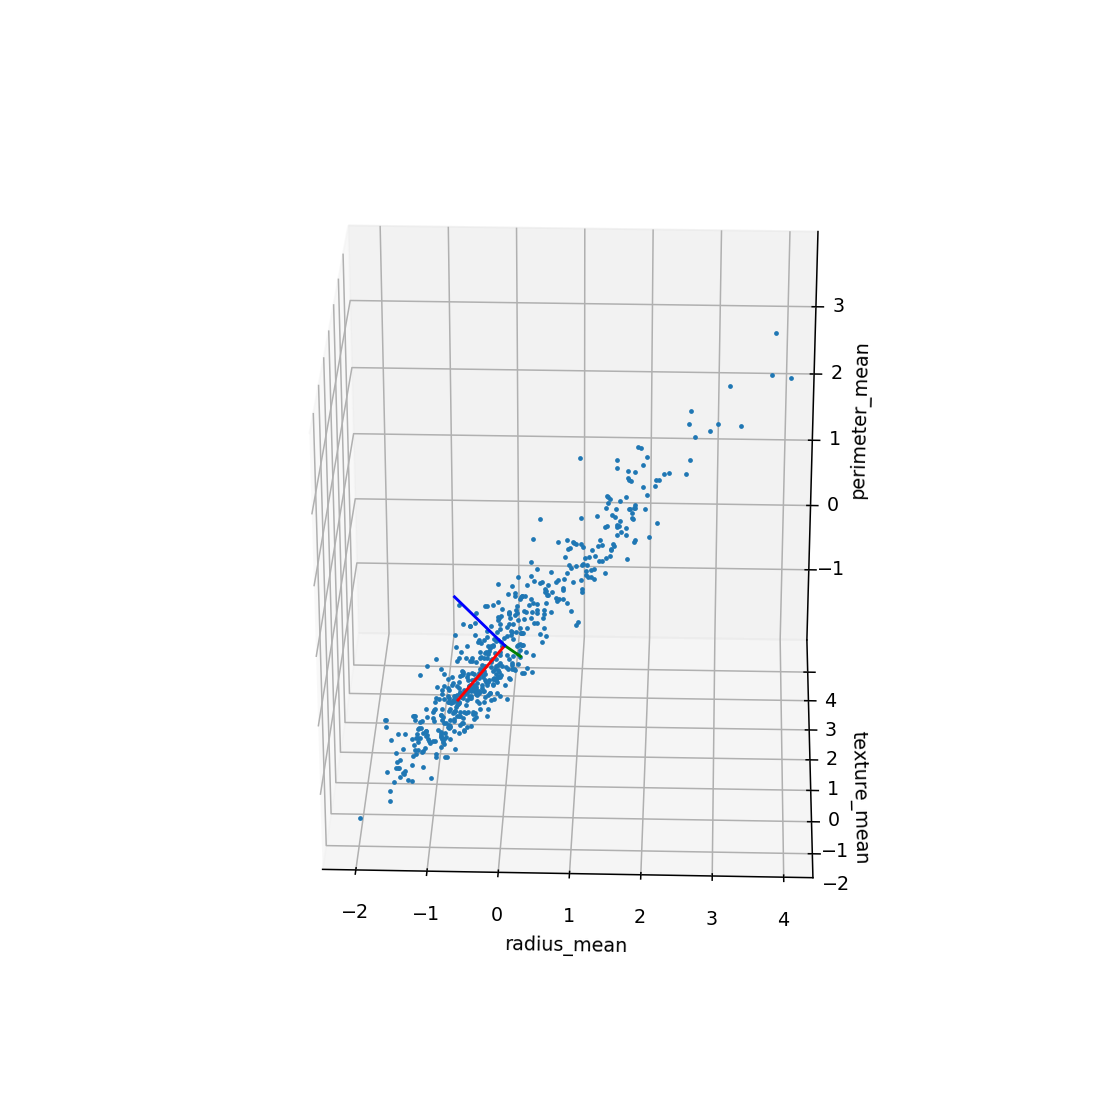

In [12]:
# plot
plot_3d_pca(x, v)

## <img src="https://img.icons8.com/dusk/64/000000/data-sheet.png" style="height:50px;display:inline"> Recap - Singular Value Decomposition (SVD)
---
* In linear algebra, the singular-value decomposition (SVD) is a factorization of a real or complex matrix. It is the generalization of the eigendecomposition of a positive semidefinite normal matrix (for example, a symmetric matrix with positive eigenvalues) to any $ m\times n$ matrix via an extension of the polar decomposition.
* Definition: $$ A_{[m \times n]} = U_{[m \times r]} \Sigma_{[r \times r]} (V_{[n \times r]})^T $$

* $A$ - Input Data matrix
    * $m \times n$ matrix (e.g. $m$ documents and $n$ terms that can appear in each document)
* $U$ - Left Singular vectors
    * $m \times r$ matrix (e.g. $m$ documents and $r$ concepts)
    * $U = eig(AA^T)$

* $\Sigma$ - Singular values
    * $r \times r$ **diagonal** matrix (strength of each 'concept')
    * $r$ represnts the **rank** of matrix $A$
    * $\Sigma = diag\left(\sqrt{eigenvalues(A^TA)}\right)$
    * **Singular Values** definition: the singular values of a matrix $X \in \mathbb{R}^{M \times N}$ are the *square root* of the **eigenvalues** of the matrix $X^TX \in \mathbb{R}^{N \times N}$. If $X \in \mathbb{R}^{N \times N}$ already, then the singular values are the eigenvalues.

* $V$ - Right Singular vectors
    * $n \times r$ matrix (e.g. $n$ terms and $r$ concepts)
    * $V = eig(A^TA)$

* Another way to look at SVD: $$ A \approx U\Sigma V^T = \sum_i \sigma_i u_i \circ v_i^T $$ 
    <img src='./assets/tut_03_svd_1.jpg' style="height:100px"> <img src='./assets/tut_03_svd_2.jpg' style="height:100px">

### <img src="https://img.icons8.com/dusk/64/000000/cinema-.png" style="height:50px;display:inline"> SVD Example - Users-to-Movies
---
We are given a dataset of user's rating (1 to 5) for several movies of 3 genres (concepts) and we wish to use SVD to decompose to the following componnets:
* User-to-Concept - which genres the users prefer: $U$ matrix
* Concepts - what is the strength of each genre in the dataset: $\Sigma$ - strength of each concept (the singular values)
* Movie-to-Concept - for each movie, what genres are the most dominant: $V$ matrix

In [13]:
# load the dataset and create a pandas DataFrame
u_t_m = np.array([[1,1,1,0,0], [2,2,2,0,0], [1,1,1,0,0], [5,5,5,0,0], [0,0,0,2,2], [0,0,0,3,3], [0,0,0,1,1]])
print("User-to-Movies matrix:")
# print(u_t_m)
u_t_m_df = pd.DataFrame(u_t_m, columns=['Matrix', 'Alien', 'Serenity', 'Casablanca', 'Amelie'],
                        index=['User 1', 'User 2','User 3', 'User 4', 'User 5', 'User 6', 'User 7'])
u_t_m_df

User-to-Movies matrix:


,Matrix,Alien,Serenity,Casablanca,Amelie
User 1,1,1,1,0,0
User 2,2,2,2,0,0
User 3,1,1,1,0,0
User 4,5,5,5,0,0
User 5,0,0,0,2,2
User 6,0,0,0,3,3
User 7,0,0,0,1,1


In [14]:
# perform SVD
rank = 2
u, s, vh = np.linalg.svd(u_t_m, full_matrices=False)
# mutiply by (-1), doesn't change the result
u, vh = -u, -vh

In [15]:
print("U of size", u[:,:rank].shape, ":")
print(u[:,:rank].astype(np.float16))
print("Singular values:")
print(s.astype(np.float16)[:rank])

U of size (7, 2) :
[[ 0.1796 -0.    ]
 [ 0.3591 -0.    ]
 [ 0.1796 -0.    ]
 [ 0.898   0.    ]
 [-0.      0.5347]
 [-0.      0.802 ]
 [-0.      0.2673]]
Singular values:
[9.64  5.293]


In [16]:
print("as a matrix:")
print(np.diag(s[:rank]).astype(np.float16))
print("V of size", vh[:rank,:].shape, ":")
print(vh[:rank,:].astype(np.float16))

as a matrix:
[[9.64  0.   ]
 [0.    5.293]]
V of size (2, 5) :
[[ 0.577  0.577  0.577 -0.    -0.   ]
 [ 0.     0.     0.     0.707  0.707]]


* **Dimension Reduction Using SVD:** Set the smallest singular values to zero and remove the corresponding eigenvectors (left and right)
    * Lower the rank ($r$) parameter.
    * In our example, we will change $r$ to 1 instead of 2.
    
* Reconstruct the approximated matrix after dimension reduction
    * $ A \approx U_r \Sigma_r V_r^T = B$
    * Measure the error by the **Matrix Norm: Frobenius Norm**: $$||M||^2_F = \sum_{ij} M_{ij}^2 \rightarrow ||A - B||_F = \sum_{ij} (A_{ij} - B_{ij})^2$$

In [17]:
# dimension reduction using SVD
rank = 1
u, s, vh = np.linalg.svd(u_t_m, full_matrices=False)
# mutiply by (-1), doesn't change the result
u, vh = -u, -vh

In [18]:
print("U of size", u[:,:rank].shape, ":")
print(u[:,:rank].astype(np.float16))
print("Singular values:")
print(s.astype(np.float16)[:rank])

U of size (7, 1) :
[[ 0.1796]
 [ 0.3591]
 [ 0.1796]
 [ 0.898 ]
 [-0.    ]
 [-0.    ]
 [-0.    ]]
Singular values:
[9.64]


In [19]:
print("as a matrix:")
print(np.diag(s[:rank]).astype(np.float16))
print("V of size", vh[:rank,:].shape, ":")
print(vh[:rank,:].astype(np.float16))

as a matrix:
[[9.64]]
V of size (1, 5) :
[[ 0.577  0.577  0.577 -0.    -0.   ]]


In [20]:
# reconstruct the user-to-movie matrix
A_approx = u[:,:rank] @ np.diag(s[:rank]) @ vh[:rank,:]
A_approx_df = pd.DataFrame(A_approx.astype(np.int), columns=['Matrix', 'Alien', 'Serenity', 'Casablanca', 'Amelie'],
                        index=['User 1', 'User 2','User 3', 'User 4', 'User 5', 'User 6', 'User 7'])
recons_error = np.sum(np.square(u_t_m - A_approx))
print("reconstruction error: {:.3f}".format(recons_error))

reconstruction error: 28.000


In [21]:
print("reconstruction of user-to-movie:")
A_approx_df

reconstruction of user-to-movie:


,Matrix,Alien,Serenity,Casablanca,Amelie
User 1,1,1,1,0,0
User 2,2,2,2,0,0
User 3,1,1,1,0,0
User 4,5,5,5,0,0
User 5,0,0,0,0,0
User 6,0,0,0,0,0
User 7,0,0,0,0,0


### <img src="https://img.icons8.com/dusk/64/000000/cinema-.png" style="height:50px;display:inline"> SVD Example - Users-to-Movies - Case Study
---
#### <img src="https://img.icons8.com/bubbles/50/000000/question-mark.png" style="height:30px;display:inline"> Question: Find users that like 'Matrix' & 'Alien'

#### <img src="https://img.icons8.com/dusk/64/000000/faq.png" style="height:30px;display:inline"> Answer: map query (input) into a 'concept space'
How to query?
* Project vectors into concept space by **inner product**  with each 'concept' vector $v_i$
* Assume we have 2 users - user *q* and user *d* such that user *q* likes the movie 'Matrix' and user *d* likes the movies 'Alien' and 'Serenity'.  

In [22]:
users = [[5, 0, 0, 0, 0], [0, 4, 5, 0, 0]]
users_df = pd.DataFrame(users, columns=['Matrix', 'Alien', 'Serenity', 'Casablanca', 'Amelie'],
                        index=['User q', 'User d'])
users_df

,Matrix,Alien,Serenity,Casablanca,Amelie
User q,5,0,0,0,0
User d,0,4,5,0,0


* It can be seen that the similiarity between the users in the ratings space is 0 (comparison element-by-element). 
* But, our intuition tells us that they both like Sci-Fi, and the reason for the zero similarity is simply because they have not seen the other user's movies. 
* Let's project the input into concept space and reconsider the similarity in that space.

In [23]:
# perform SVD
rank = 2
u, s, vh = np.linalg.svd(u_t_m, full_matrices=False)
# mutiply by (-1), doesn't change the result
u, vh = -u, -vh
# movie-to-concepts
users_concepts = np.array(users, dtype=np.float) @ vh[:rank,:].T
print("users concepts similarity:")
users_concepts_df = pd.DataFrame(users_concepts, columns=['Sci-Fi', 'Other'],
                        index=['User q', 'User d'])
users_concepts_df

users concepts similarity:


,Sci-Fi,Other
User q,2.886751,0.0
User d,5.196152,0.0


* **Observation:** even though user *d* did not rate 'Matrix', the user is similar to user *q*, that is, the similarity is not 0, and they might enjoy the same movies!

### <img src="https://img.icons8.com/dusk/64/000000/trust.png" style="height:50px;display:inline"> The Relationship Between PCA & SVD
---
* The PCA viewpoint requires that one compute the eigenvalues and eigenvectors of the covariance matrix, which is the product $XX^T$ (or $X^TX$, depending on the dimensions, as long as the covariance matrix is $\in \mathcal{R}^{d \times d}$, where $d$ is the number of features), where $X$ is the data matrix. Since the covariance matrix is symmetric, the matrix is diagonalizable, and the eigenvectors can be normalized such that they are orthonormal: $XX^T = WAW^T$

* On the other hand, applying SVD to the data matrix $X$ as follows: $X=U\Sigma V^T$, and attempting to construct the covariance matrix from this decomposition gives: $$XX^T = (U\Sigma V^T)(U \Sigma V^T)^T = U \Sigma^2 U^T $$ the last transition is due to $V$ being orthonormal ($VV^T = I$). Thus, the square roots of the eigenvalues of $XX^T$ are the singular values of $X$.
* Using the SVD to perform PCA makes much better sense numerically than forming the covariance matrix to begin with, since the formation of $XX^⊤$ can cause loss of precision. But performing SVD is slower.

### <img src="https://img.icons8.com/color/48/000000/critical-thinking.png" style="height:50px;display:inline"> PCA as Dimensionality Reduction Technique
---
* **Pro**: Optimal reconstruction error in Frobenius norm
* **Con**: Interpretability problem - features lose their previous meaning
    * A singular vector specifies a linear combination of all input columns or rows
    * PCA is **sensitive to outliers** since it is minimizing $l_2$ norms. The squaring of deviations from the outliers, they will dominate the total norm and therefore will drive the PCA components.
* **When will PCA work?**
    * PCA assumes **linear** realtionships among variables
    * Clouds of points in *p*-dimensional space has linear dimensions that can be effectively summarized by the principal axes
    * If the structure in the data is **non-linear** (the cloud of points twists and curves its way through *p*-dimensional space), the principal axes will not be an efficient and informative summary of the data.
    

In [24]:
# PCA using scikit learn
from sklearn.decomposition import PCA
X = np.array([[0, 2], [2, 1], [1, 0]])
X = X - X.mean(axis=0)
print(X)
pca = PCA()
X_pca = pca.fit_transform(X)
print(pca.components_)
# PC's are horizontal vectors

[[-1.  1.]
 [ 1.  0.]
 [ 0. -1.]]
[[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]


## <img src="https://img.icons8.com/dusk/64/000000/circled-dot.png" style="height:50px;display:inline"> Feature Selection
---
### <img src="https://img.icons8.com/dusk/64/000000/accuracy.png" style="height:50px;display:inline"> Goal - Find an informative feature subset

* **Methods**:
    * **Filter Methods**: ranks features or feature subsets *independently* of the classifier
        * For example: by correlation between features, correlation between features and the label
    * **Wrapper Methods**: uses a classifier to assess features or feature subsets
    * **Embedded Methods**: specific to a given learning machine. Performs variable selection (implicitly) in the training process (e.g. decision trees, Naive Bayes...)

### <img src="https://img.icons8.com/bubbles/100/000000/filter.png" style="height:50px;display:inline"> Filter Methods
---
General Scheme:
<img src="./assets/tut_04_filter_methods.jpg" style="height:300px">

Let's start with an example from <a href="http://www.jmlr.org/papers/volume3/guyon03a/guyon03a.pdf">Guyon and Elissef, JMLR 2003</a>:

Consider the classification problem for two classes. For each class, we drew at random $m = 100$
examples, each of the two variables being drawn independently according to a normal distribution of
standard deviation 1. The class centers are placed at coordinates (-1; -1) and (1; 1).

* In the following figure, the *left* figure shows the scatter plot in the two-dimensional space of the input variables. 
* We also show on the same figure **histograms** of the projections of the examples on the axes. 
    * To facilitate its reading, the scatter plot is shown twice with an **axis exchange**. 
* The figure on the *right* shows the same scatter plots after **a forty five degree rotation.** 

<img src="./assets/tut_04_feature_select_1.jpg" style="height:300px">

* In the right figure representation, the **x-axis** projection provides a better separation of the two classes: the standard deviation of both classes is the same, but the distance between centers in projection is now $2 \sqrt{2}$ instead of $2$. 
* Noise reduction and consequently better class separation may be obtained by adding variables that are presumably redundant. **Variables that are independently and identically distributed are not truly redundant.**

<img src="./assets/tut_04_feature_select_2.jpg" style="height:300px">

* In the above figure (left), in the direction of the class center line, the standard deviation of the class conditional distributions is $\sqrt{2}$, while in the perpendicular direction it is a small value ($\epsilon = \frac{1}{10}$).
* With this construction, as $\epsilon \rightarrow 0$, the input variables have the same separation power as in the case of the example of the previous example, with a standard deviation of the class distributions of one and a distance of the class centers of 2.
* But the feature constructed as the **sum of the input variables** has no better separation power: a standard deviation of $\sqrt{2}$ and a class center separation of $2 \sqrt{2}$ (a simple scaling that does not change the separation power).

* Therefore, in the limit of perfect variable correlation (zero variance in the direction perpendicular to the class center line), single variables provide the same separation as the sum of the two variables. 
* **Perfectly correlated variables are truly redundant** in the sense that no additional information is gained by adding them.

* In contrast, in the example of the *right* figure, the first principal direction of the covariance matrices of the class conditional densities is perpendicular to the class center line.
* In this case, more is gained by adding the two variables than in the example at the beginning.
* One notices that in spite of their great complementarity (in the sense that a perfect separation can be achieved in the two-dimensional space spanned by the two variables), the two variables are (anti-)correlated.
* More anti-correlation is obtained by making the class centers closer and increasing the ratio of the variances of the class conditional distributions.
* **Very high variable correlation (or anti-correlation) does not mean absence of variable complementarity.**

#### Can a Variable that is Useless by Itself be Useful with Others?

* One concern about multivariate methods is that they are prone to **overfitting**. 
* The problem is aggravated when the number of variables to select from is large compared to the number of examples.
* It is tempting to use a variable ranking method to filter out the least promising variables before using a multivariate method. 
    * Still one may wonder whether one could potentially lose some valuable variables through that filtering process.

Consider the following example:

<img src="./assets/tut_04_feature_select_3.jpg" style="height:300px">

* On the *left*, the two class conditional distributions have identical covariance matrices, and the principal directions are oriented diagonally. The class centers are separated on one axis, but not on the other. By itself one variable is “useless”.
* Still, the dimensional separation is better than the separation using the “useful” variable alone.
* Therefore, **a variable that is completely useless by itself can provide a significant performance improvement when taken with others**.

* On the *right*, we ask whether two variables that are useless by themselves can provide a good separation when taken together. We constructed an example of such a case, inspired by the famous **XOR problem**.
* In the figure, we drew examples for two classes using four Gaussians placed on the corners of a square at coordinates (0; 0), (0; 1), (1; 0), and (1; 1).
    * The class labels of these four “clumps” are attributed according to the truth table of the logical XOR function: $f(0;0)=0$, $f(0; 1)=1$, $f(1; 0)=1$; $f(1; 1)=0$.
* We notice that the projections on the axes provide no class separation. Yet, in the two dimensional space the classes can easily be separated (albeit not with a linear decision function). 
* **Two variables that are useless by themselves can be useful together.**

### <img src="https://img.icons8.com/bubbles/100/000000/gift.png" style="height:50px;display:inline"> Wrapper Methods
---
General Scheme:
<img src="./assets/tut_04_wrapper_methods_1.jpg" style="height:300px">

* A wrapper method needs one machine learning algorithm and uses its performance as evaluation criteria. 
* This method searches for a feature which is best-suited for the machine learning algorithm and aims to improve the mining performance. 
* To evaluate the features, the predictive accuracy used for classification tasks and goodness of cluster is evaluated using clustering.

* **Sequential Forward Selection** - The procedure starts with an empty set of features [reduced set]. The best of the original features is determined and added to the reduced set. At each subsequent iteration, the best of the remaining original attributes is added to the set.
    * Algorithm: <img src="./assets/tut_04_sfs.jpg" style="height:100px">

Example: <img src="./assets/tut_04_sfs_example.jpg" style="height:300px">

* **Sequential Backward Selection** - The procedure starts with the full set of attributes. At each step, it removes the worst attribute remaining in the set. 
    * Algorithm: <img src="./assets/tut_04_sbs.jpg" style="height:100px">

* **Bidirectional Search** - The stepwise forward selection and backward elimination methods can be combined so that, at each step, the procedure selects the best attribute and removes the worst from among the remaining attributes.
    * Algorithm: <img src="./assets/tut_04_sfs_sbs.jpg" style="height:300px">

* **Recursive Feature Elimination** (Scikit-learn) - Recursive feature elimination performs a greedy search to find the best performing feature subset. It iteratively creates models and determines the best or the worst performing feature at each iteration. It constructs the subsequent models with the left features until all the features are explored. It then ranks the features based on the order of their elimination. In the worst case, if a dataset contains N number of features RFE will do a greedy search for $2^N$ combinations of features.

### Filter vs. Wrapper
---
* Filter methods do not incorporate a machine learning model in order to determine if a feature is good or bad whereas wrapper methods use a machine learning model and train it the feature to decide if it is essential or not.

* Filter methods are much faster compared to wrapper methods as they do not involve training the models. On the other hand, wrapper methods are computationally costly, and in the case of massive datasets, wrapper methods are not the most effective feature selection method to consider.

* Filter methods may fail to find the best subset of features in situations when there is not enough data to model the statistical correlation of the features, but wrapper methods can always provide the best subset of features because of their exhaustive nature.

* Using features from wrapper methods in your final machine learning model can lead to overfitting as wrapper methods already train machine learning models with the features and it affects the true power of learning. But the features from filter methods will not lead to overfitting in most of the cases.

* <a href="https://scikit-learn.org/stable/modules/feature_selection.html">Feature Selection in Scikit-Learn</a>

### <img src="https://img.icons8.com/bubbles/50/000000/video-playlist.png" style="height:50px;display:inline"> Recommended Videos
---
#### <img src="https://img.icons8.com/cute-clipart/64/000000/warning-shield.png" style="height:30px;display:inline"> Warning!
* These videos do not replace the lectures and tutorials.
* Please use these to get a better understanding of the material, and not as an alternative to the written material.

#### Video By Subject

* PCA (1) - <a href="https://www.youtube.com/watch?v=FgakZw6K1QQ">StatQuest: Principal Component Analysis (PCA), Step-by-Step</a>
* PCA (2) - <a href="https://www.youtube.com/watch?v=TJdH6rPA-TI">Principal Component Analysis (PCA) - Computerphile</a>
* SVD - <a href="https://www.youtube.com/watch?v=P5mlg91as1c">Lecture 47 — Singular Value Decomposition | Stanford University</a>
* Feature Selection - <a href="https://www.youtube.com/watch?v=EqLBAmtKMnQ">Feature Selection Techniques Easily Explained | Machine Learning</a>

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
---
* <a href="https://www.datacamp.com/community/tutorials/feature-selection-python">Beginner's Guide to Feature Selection in Python</a>
* Inspired by slides by Elad Osherov and slides from <a href="http://www.mmds.org/">MMDS</a> by Jure Leskovec
* Icons from <a href="https://icons8.com/">Icon8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/